In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
data = pd.read_excel('company_data.xlsx')
data.head()

,Order ID,Order Date,Unit Cost,Price,Order Qty,Cost of Sales,Sales,Profit,Channel,Promotion Name,Product Name,Manufacturer,Product Sub Category,Product Category,Region,City,Country
0,7077,2017-09-13,76.094968,304.00,9,684.854710,2714.7200,2029.865290,Store,European Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Europe,Moscow,Russia
1,117,2016-08-20,7.491753,12.99,4,29.967011,50.1414,20.174389,Store,European Spring Promotion,Contoso 512MB MP3 Player E51 Blue,"Contoso, Ltd",MP4&MP3,Audio,Europe,Moscow,Russia
2,7018,2016-07-08,10.122338,159.99,9,91.101039,1395.1128,1304.011761,Store,European Spring Promotion,Contoso DVD 9-Inch Player Portable M300 Silver,"Contoso, Ltd",Movie DVD,"Music, Movies and Audio Books",Europe,Moscow,Russia
3,140,2018-08-11,0.576153,25.69,18,10.370759,462.4200,452.049241,Store,North America Spring Promotion,NT Bluetooth Stereo Headphones E52 Pink,Northwind Traders,Bluetooth Headphones,Audio,North America,Bellevue,United States
4,491,2017-07-15,108.508777,304.00,9,976.578991,2614.4000,1637.821009,Online,Asian Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Asia,Beijing,China


In [183]:
data.duplicated().sum()

np.int64(0)

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              15000 non-null  int64         
 1   Order Date            15000 non-null  datetime64[ns]
 2   Unit Cost             15000 non-null  float64       
 3   Price                 15000 non-null  float64       
 4   Order Qty             15000 non-null  int64         
 5   Cost of Sales         15000 non-null  float64       
 6   Sales                 15000 non-null  float64       
 7   Profit                15000 non-null  float64       
 8   Channel               15000 non-null  object        
 9   Promotion Name        15000 non-null  object        
 10  Product Name          15000 non-null  object        
 11  Manufacturer          15000 non-null  object        
 12  Product Sub Category  15000 non-null  object        
 13  Product Category

In [185]:
data.drop('Order ID', axis=1, inplace=True)

In [186]:
data.head()

,Order Date,Unit Cost,Price,Order Qty,Cost of Sales,Sales,Profit,Channel,Promotion Name,Product Name,Manufacturer,Product Sub Category,Product Category,Region,City,Country
0,2017-09-13,76.094968,304.00,9,684.854710,2714.7200,2029.865290,Store,European Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Europe,Moscow,Russia
1,2016-08-20,7.491753,12.99,4,29.967011,50.1414,20.174389,Store,European Spring Promotion,Contoso 512MB MP3 Player E51 Blue,"Contoso, Ltd",MP4&MP3,Audio,Europe,Moscow,Russia
2,2016-07-08,10.122338,159.99,9,91.101039,1395.1128,1304.011761,Store,European Spring Promotion,Contoso DVD 9-Inch Player Portable M300 Silver,"Contoso, Ltd",Movie DVD,"Music, Movies and Audio Books",Europe,Moscow,Russia
3,2018-08-11,0.576153,25.69,18,10.370759,462.4200,452.049241,Store,North America Spring Promotion,NT Bluetooth Stereo Headphones E52 Pink,Northwind Traders,Bluetooth Headphones,Audio,North America,Bellevue,United States
4,2017-07-15,108.508777,304.00,9,976.578991,2614.4000,1637.821009,Online,Asian Spring Promotion,Contoso SLR Camera M143 Grey,"Contoso, Ltd",Digital SLR Cameras,Cameras and camcorders,Asia,Beijing,China


In [187]:
data['Unit Cost'].describe()

count    15000.000000
mean       124.425132
std        163.569912
min          0.001576
25%         16.847345
50%         69.688876
75%        164.348636
max       1896.133845
Name: Unit Cost, dtype: float64

In [188]:
for column in data.columns : 
    if data[column].dtype == int or data[column].dtype == float : 
        print(column)
        print( data [ data[column] > data[column].mean() + (data[column].std() * 3 )][column])
        print()

Unit Cost
182       636.303199
245       769.528341
408       917.718000
410      1856.384904
416       674.093147
            ...     
14470     709.202790
14628     642.305055
14700     846.198790
14784     725.778570
14957     986.088945
Name: Unit Cost, Length: 290, dtype: float64

Price
56       1600.0
76       1580.0
148      1600.0
192      1592.2
245      1530.0
          ...  
14470    1560.0
14646    1530.0
14825    1520.0
14873    2295.0
14957    2499.0
Name: Price, Length: 274, dtype: float64

Order Qty
423       200
757      1040
758       200
871       400
872       480
         ... 
14548     160
14650     180
14665     160
14859     200
14929     240
Name: Order Qty, Length: 155, dtype: int64

Cost of Sales
65       20076.537133
76       15891.306863
79       16318.255619
123      16748.478078
245       9234.340093
             ...     
14594    10096.564864
14641    11808.656095
14711     9827.267501
14938    13681.954808
14953     8973.886283
Name: Cost of Sales, Leng

In [189]:
for column in data.columns :
    if data[column].dtype == int or data[column].dtype == float :
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR 
        lower_bound = Q1 - 1.5 * IQR
        if data[column].dtype == int or data[column].dtype == float : 
            data[column] = data[column].clip(upper=upper_bound)


In [190]:
for column in data.columns : 
    if data[column].dtype == int or data[column].dtype == float : 
        print(column)
        print( data [ data[column] > data[column].mean() + (data[column].std() * 3 )][column])
        print()

Unit Cost
Series([], Name: Unit Cost, dtype: float64)

Price
Series([], Name: Price, dtype: float64)

Order Qty
Series([], Name: Order Qty, dtype: int64)

Cost of Sales
Series([], Name: Cost of Sales, dtype: float64)

Sales
Series([], Name: Sales, dtype: float64)

Profit
Series([], Name: Profit, dtype: float64)



In [191]:
for column in data.columns : 
    if data[column].dtype == int or data[column].dtype == float : 
        print(column)
        print( data[column].describe())
        print()

Unit Cost
count    15000.000000
mean       110.869803
std        115.710853
min          0.001576
25%         16.847345
50%         69.688876
75%        164.348636
max        385.600571
Name: Unit Cost, dtype: float64

Price
count    15000.000000
mean       267.036359
std        238.295147
min          0.950000
25%         59.000000
50%        205.000000
75%        366.000000
max        826.500000
Name: Price, dtype: float64

Order Qty
count    15000.000000
mean        11.423400
std          4.302747
min          4.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         19.000000
Name: Order Qty, dtype: float64

Cost of Sales
count    15000.000000
mean      1340.381578
std       1462.950821
min          0.015756
25%        189.677420
50%        752.752320
75%       2006.030237
max       4730.559463
Name: Cost of Sales, dtype: float64

Sales
count    15000.000000
mean      3249.160310
std       3143.768379
min          4.750000
25%        645.000000
50%     

In [192]:
channel_counts = data['Channel'].value_counts()
channel_counts

Channel
Store       9981
Online      2351
Reseller    1784
Catalog      884
Name: count, dtype: int64

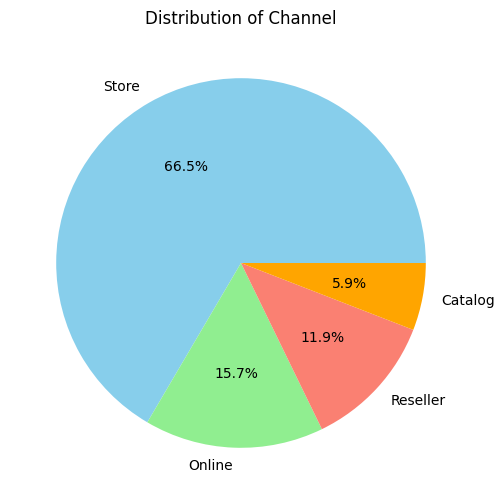

In [193]:
plt.figure(figsize=(6,6))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Distribution of Channel')
plt.show()

In [194]:
data["Promotion Name"].value_counts()

Promotion Name
No Discount                               5207
North America Spring Promotion            2079
North America Back-to-School Promotion    2040
North America Holiday Promotion           1415
European Holiday Promotion                1025
Asian Holiday Promotion                    750
Asian Spring Promotion                     745
European Spring Promotion                  721
European Back-to-Scholl Promotion          520
Asian Summer Promotion                     498
Name: count, dtype: int64

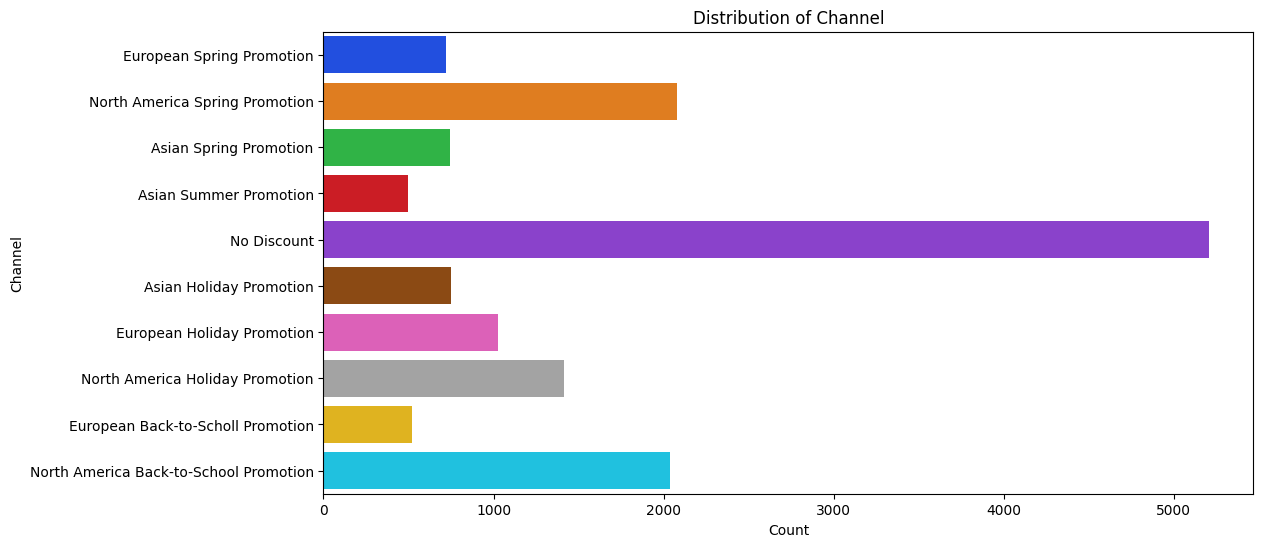

In [195]:
plt.figure(figsize=(12, 6))
sns.countplot(data= data, y="Promotion Name", hue="Promotion Name", palette="bright")
plt.ylabel('Channel')
plt.xlabel('Count')
plt.title('Distribution of Channel')
plt.show()

In [196]:
data['Product Name'].nunique()

1638

In [197]:
data['Product Category'].value_counts()


Product Category
Computers                        5359
Cameras and camcorders           3590
Cell phones                      2609
TV and Video                     1878
Music, Movies and Audio Books     832
Audio                             732
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Product Category')

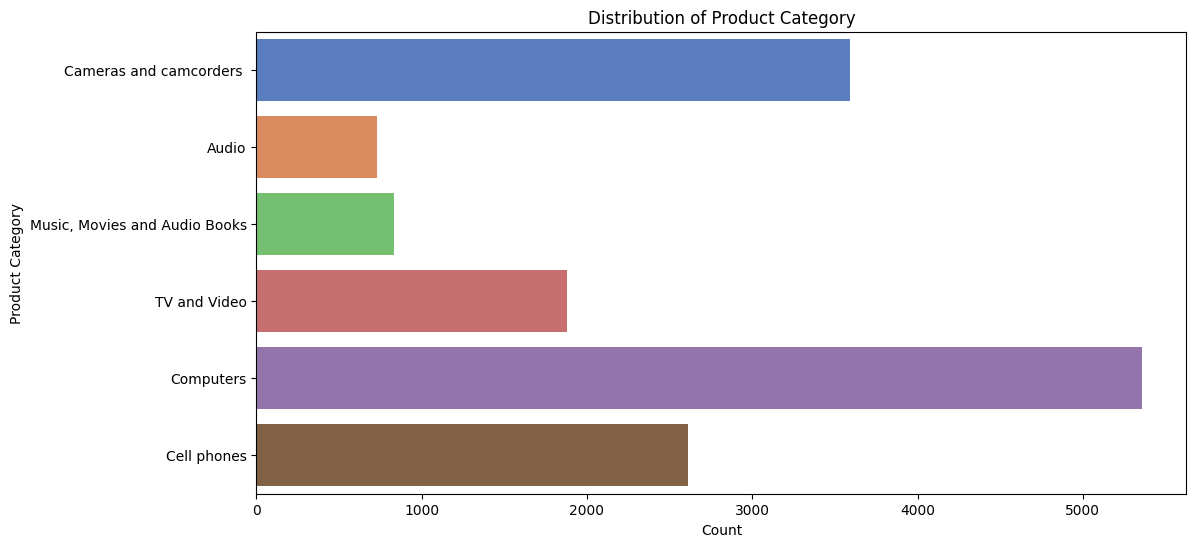

In [198]:
plt.figure(figsize=(12, 6))
sns.countplot(data= data, y= "Product Category", hue="Product Category", palette="muted", legend=False)
plt.ylabel('Product Category')
plt.xlabel('Count')
plt.title('Distribution of Product Category')

In [199]:
manufacturer_counts = data['Manufacturer'].value_counts()
manufacturer_counts

Manufacturer
Contoso, Ltd            4891
Proseware, Inc.         1639
Fabrikam, Inc.          1605
Southridge Video        1540
A. Datum Corporation    1342
The Phone Company       1314
Adventure Works         1125
Wide World Importers     990
Litware, Inc.            348
Northwind Traders        206
Name: count, dtype: int64

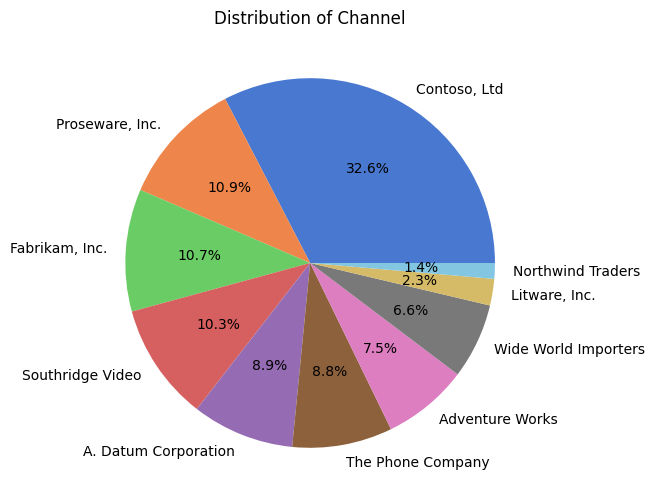

In [200]:
plt.figure(figsize=(6,6))
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%', colors=sns.color_palette("muted"))
plt.title('Distribution of Channel')
plt.show()

In [201]:
category_counts = data['Product Sub Category'].value_counts()
category_counts

Product Sub Category
Computers Accessories               1642
Digital SLR Cameras                 1069
Digital Cameras                     1012
Camcorders                           987
Printers, Scanners & Fax             971
Home & Office Phones                 930
Projectors & Screens                 874
Smart phones & PDAs                  855
Home Theater System                  848
Movie DVD                            832
Laptops                              812
Monitors                             648
Touch Screen Phones                  559
Cameras & Camcorders Accessories     522
Car Video                            490
Desktops                             412
Televisions                          349
MP4&MP3                              308
Bluetooth Headphones                 306
Cell phones Accessories              265
VCD & DVD                            191
Recording Pen                        118
Name: count, dtype: int64

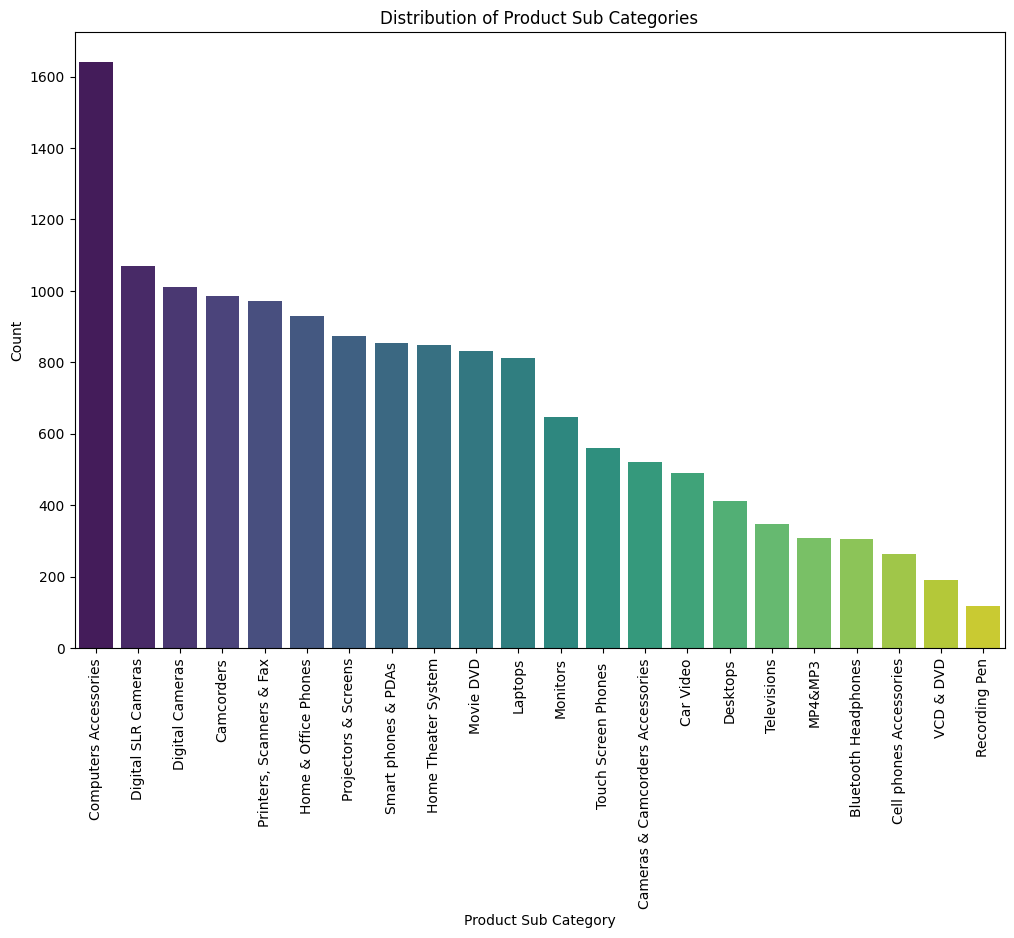

In [202]:
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, hue=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Product Sub Category')
plt.ylabel('Count')
plt.title('Distribution of Product Sub Categories')
plt.show()

In [203]:
region_counts = data['Region'].value_counts()
region_counts

Region
North America    8869
Europe           3081
Asia             3050
Name: count, dtype: int64

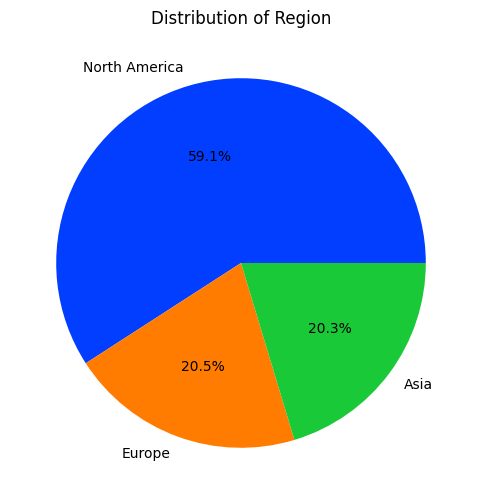

In [204]:
plt.figure(figsize=(12, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=sns.color_palette("bright"))
plt.title('Distribution of Region')
plt.show()

In [205]:
data['City'].nunique()

263

In [206]:
data['Country'].nunique()

34

In [207]:
data['Country'].value_counts()

Country
United States      8510
China              1673
Germany            1118
France              781
United Kingdom      477
Canada              359
Japan               298
Russia              166
India               152
Australia           149
Turkmenistan        119
Italy               111
Pakistan             93
Iran                 89
Syria                86
Thailand             82
South Korea          72
Taiwan               50
Singapore            49
Bhutan               48
Kyrgyzstan           46
Armenia              44
Denmark              42
Malta                41
Romania              39
Portugal             38
the Netherlands      38
Ireland              37
Poland               37
Switzerland          35
Slovenia             34
Spain                32
Sweden               30
Greece               25
Name: count, dtype: int64

In [208]:
for column in data.columns:
    if data[column].dtype == int or data[column].dtype == float:
        print(column)

Unit Cost
Price
Order Qty
Cost of Sales
Sales
Profit


<Figure size 1200x800 with 0 Axes>

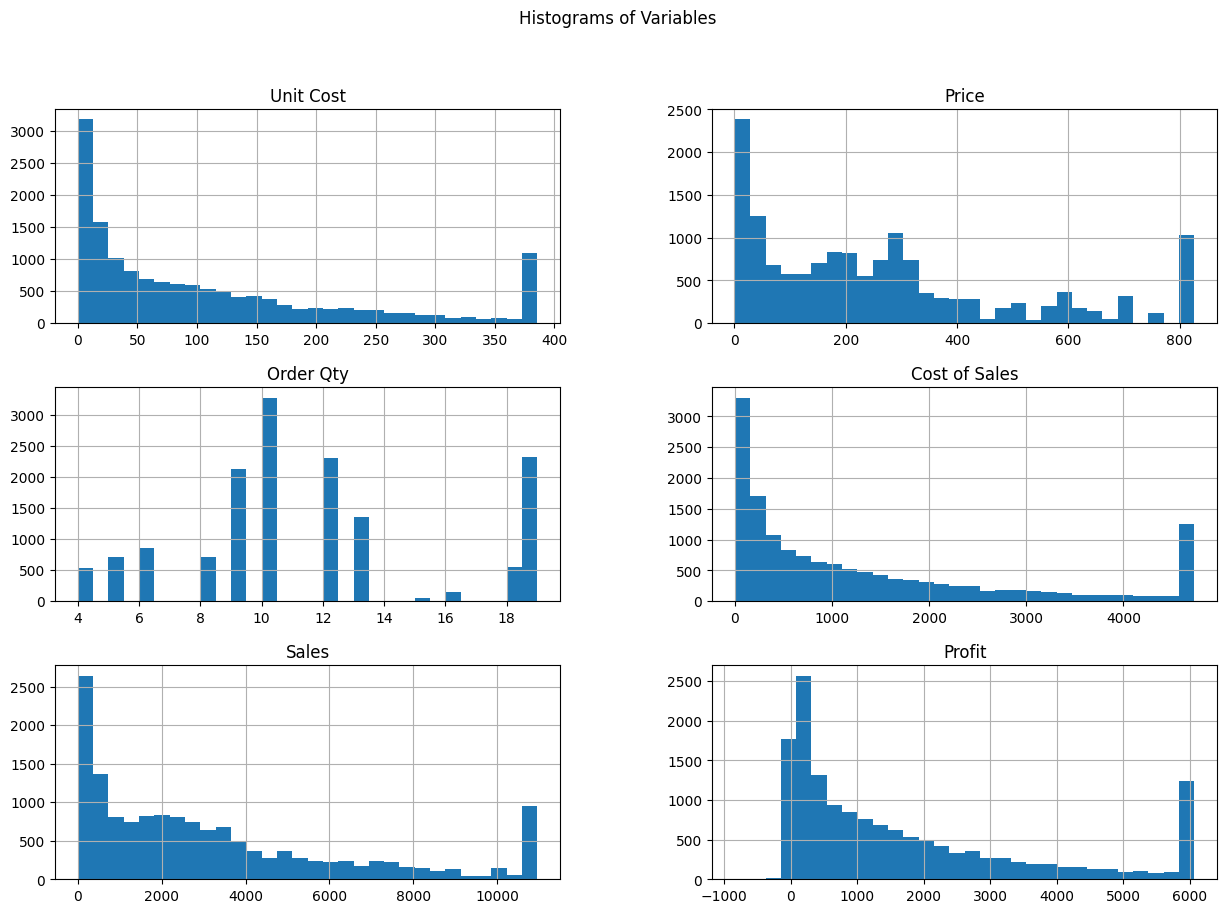

In [209]:
plt.figure(figsize=(12, 8))
data[['Unit Cost', 'Price', 'Order Qty', 'Cost of Sales', 'Sales', 'Profit']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Variables')
plt.show()

In [210]:
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)

               Unit Cost     Price  Order Qty  Cost of Sales     Sales  \
Unit Cost       1.000000  0.753180   0.017902       0.906659  0.669730   
Price           0.753180  1.000000   0.017415       0.682492  0.878585   
Order Qty       0.017902  0.017415   1.000000       0.299177  0.350564   
Cost of Sales   0.906659  0.682492   0.299177       1.000000  0.772903   
Sales           0.669730  0.878585   0.350564       0.772903  1.000000   
Profit          0.333410  0.788035   0.282983       0.411688  0.866140   

                 Profit  
Unit Cost      0.333410  
Price          0.788035  
Order Qty      0.282983  
Cost of Sales  0.411688  
Sales          0.866140  
Profit         1.000000  


In [211]:
data.groupby('Product Category')['Profit'].mean().reset_index()

,Product Category,Profit
0,Audio,783.738572
1,Cameras and camcorders,2320.247470
2,Cell phones,1188.199626
3,Computers,1686.702356
4,"Music, Movies and Audio Books",761.389886
5,TV and Video,2212.927365


In [212]:
data.groupby(['Product Category', 'Product Sub Category'])['Profit'].mean().reset_index()

,Product Category,Product Sub Category,Profit
0,Audio,Bluetooth Headphones,499.331597
1,Audio,MP4&MP3,860.186868
2,Audio,Recording Pen,1321.725518
3,Cameras and camcorders,Camcorders,3544.806202
4,Cameras and camcorders,Cameras & Camcorders Accessories,316.412070
5,Cameras and camcorders,Digital Cameras,1432.900492
6,Cameras and camcorders,Digital SLR Cameras,3008.140596
7,Cell phones,Cell phones Accessories,1352.822403
8,Cell phones,Home & Office Phones,190.018669
9,Cell phones,Smart phones & PDAs,1809.608536


In [213]:
data.groupby('Region')['Sales'].sum().reset_index()

,Region,Sales
0,Asia,1.064698e+07
1,Europe,9.327334e+06
2,North America,2.876309e+07


In [214]:
data.groupby('Manufacturer')['Sales'].sum().reset_index()

,Manufacturer,Sales
0,A. Datum Corporation,4.262684e+06
1,Adventure Works,6.305169e+06
2,"Contoso, Ltd",8.854782e+06
3,"Fabrikam, Inc.",1.027747e+07
4,"Litware, Inc.",2.029651e+06
5,Northwind Traders,1.365720e+05
6,"Proseware, Inc.",4.720770e+06
7,Southridge Video,3.022494e+06
8,The Phone Company,4.316743e+06
9,Wide World Importers,4.811066e+06


Order Date
2016-06-30    2361.880823
2016-07-31    2472.506284
2016-08-31    2564.570372
2016-09-30    2842.043290
2016-10-31    2717.257438
2016-11-30    2777.353063
2016-12-31    3096.286904
2017-01-31    3050.174845
2017-02-28    2891.905085
2017-03-31    2684.708166
2017-04-30    3206.059878
2017-05-31    3177.267282
2017-06-30    3117.257403
2017-07-31    3082.033243
2017-08-31    3006.582262
2017-09-30    3185.177018
2017-10-31    3249.266424
2017-11-30    2923.644377
2017-12-31    3509.172655
2018-01-31    3421.704798
2018-02-28    3537.012322
2018-03-31    3495.815732
2018-04-30    3743.902058
2018-05-31    3791.777561
2018-06-30    3571.740832
2018-07-31    3431.055923
2018-08-31    3548.422849
2018-09-30    3611.950521
2018-10-31    3863.203626
2018-11-30    4125.685099
2018-12-31    3872.855864
2019-01-31    4198.817954
2019-02-28    3992.071820
2019-03-31    3713.880328
2019-04-30    4182.791074
2019-05-31    4178.370025
2019-06-30    3668.614353
Freq: ME, Name: Sales, dtyp

C:\Users\tarek\AppData\Local\Temp\ipykernel_8468\2823573454.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data['Sales'].resample('M').mean()


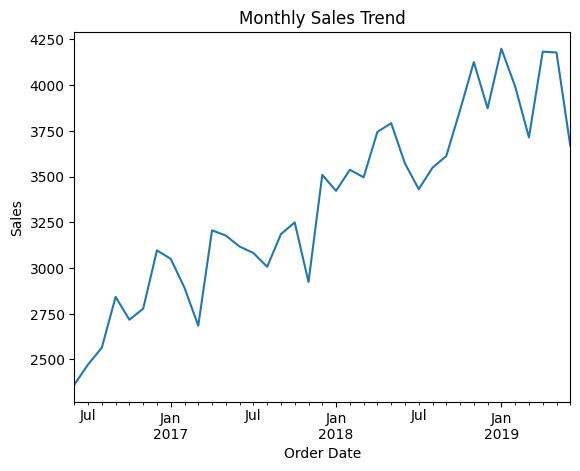

In [215]:
data.set_index('Order Date', inplace=True)

monthly_sales = data['Sales'].resample('M').mean()
print(monthly_sales)

monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

In [216]:
data['Day of Week'] = data.index.day_name()
data.groupby('Day of Week')['Sales'].mean()

Day of Week
Friday       3293.072119
Monday       3068.160970
Saturday     3233.088044
Sunday       3289.713766
Thursday     3283.129518
Tuesday      3332.993924
Wednesday    3252.950051
Name: Sales, dtype: float64

In [217]:
data['Month'] = data.index.month
data['Year'] = data.index.year

print(data.groupby('Month')['Sales'].mean())
print(data.groupby('Year')['Sales'].mean())

Month
1     3479.001204
2     3397.960332
3     3176.007555
4     3646.724202
5     3614.312756
6     2936.914046
7     2920.297367
8     2982.860644
9     3126.120262
10    3140.936927
11    3170.210746
12    3452.567727
Name: Sales, dtype: float64
Year
2016    2698.505775
2017    3076.183351
2018    3672.301911
2019    4043.505630
Name: Sales, dtype: float64


In [218]:
weekly_sales = data['Sales'].resample('W').sum()
print(weekly_sales)

quarterly_profit = data['Profit'].resample('Q').mean()
print(quarterly_profit)

Order Date
2016-06-05    145890.8500
2016-06-12    275893.5905
2016-06-19    350302.2950
2016-06-26    265817.8215
2016-07-03    242719.9058
                 ...     
2019-05-05    289409.9820
2019-05-12    364981.1240
2019-05-19    284942.7575
2019-05-26    263879.4810
2019-06-02    228953.5280
Freq: W-SUN, Name: Sales, Length: 157, dtype: float64
Order Date
2016-06-30    1279.832194
2016-09-30    1412.932175
2016-12-31    1484.493480
2017-03-31    1544.588299
2017-06-30    1665.590763
2017-09-30    1624.677188
2017-12-31    1733.728706
2018-03-31    1879.914944
2018-06-30    1921.903204
2018-09-30    1904.280560
2018-12-31    2110.804732
2019-03-31    2076.493976
2019-06-30    2165.693884
Freq: QE-DEC, Name: Profit, dtype: float64


C:\Users\tarek\AppData\Local\Temp\ipykernel_8468\671361284.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_profit = data['Profit'].resample('Q').mean()
